### 탐색적 분석
- Exploratory Data Analysis  - EDA
- 본격적인 데이터 분석전에 데이터의 각 컬럼에 대한 이해
- 데이터의 결측치, 이상치 처리 및 필터링을 수행
- 누구나 이해가기 쉬운 시각화를 수행하는 과정

In [1]:
# iris 데이터를 spark 객체로 생성
iris = spark.read.csv('csv/iris.csv', header=False, inferSchema=True)
iris.show(5)

+---+---+---+---+------+
|_c0|_c1|_c2|_c3|   _c4|
+---+---+---+---+------+
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|4.7|3.2|1.3|0.2|setosa|
|4.6|3.1|1.5|0.2|setosa|
|5.0|3.6|1.4|0.2|setosa|
+---+---+---+---+------+
only showing top 5 rows



In [2]:
# 컬럼명 변경 :  withColumnRenamed(기존이름, 새이름)
iris =iris.withColumnRenamed('_c0','Sepal Length').withColumnRenamed('_c1','Sepal Width').withColumnRenamed('_c2','Petal Length').withColumnRenamed('_c3','Petal Width').withColumnRenamed('_c4','Species')

In [3]:
iris.show(5)

+------------+-----------+------------+-----------+-------+
|Sepal Length|Sepal Width|Petal Length|Petal Width|Species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [4]:
# 데이터분석 함수 : avg, max, min, sum, count
# agg({컬럼명:집계함수})
meanVals = iris.agg({'Sepal Length':'avg','Sepal Width':'avg'})
meanVals.show()

+-----------------+------------------+
|avg(Sepal Length)|  avg(Sepal Width)|
+-----------------+------------------+
|5.843333333333335|3.0540000000000007|
+-----------------+------------------+



In [5]:
maxVals = iris.agg({'Sepal Length':'max','Sepal Width':'max'})
maxVals.show()

+-----------------+----------------+
|max(Sepal Length)|max(Sepal Width)|
+-----------------+----------------+
|              7.9|             4.4|
+-----------------+----------------+



In [6]:
# 데이터 함수2 : var_samp(분산), stddev_samp(표준편차), cov(공분산), corr(상관계수)
varVals = iris.agg({'Sepal Length':'var_samp','Sepal Width':'var_samp'})
varVals.show()

+----------------------+---------------------+
|var_samp(Sepal Length)|var_samp(Sepal Width)|
+----------------------+---------------------+
|    0.6856935123042518|   0.1880040268456377|
+----------------------+---------------------+



In [7]:
stddevVals = iris.agg({'Sepal Length':'stddev_samp','Sepal Width':'stddev_samp'})
stddevVals.show()

+-------------------------+------------------------+
|stddev_samp(Sepal Length)|stddev_samp(Sepal Width)|
+-------------------------+------------------------+
|       0.8280661279778637|     0.43359431136217375|
+-------------------------+------------------------+



In [8]:
covVals = iris.cov('Sepal Length','Sepal Width')
covVals

-0.03926845637583896

In [9]:
corrVals = iris.corr('Sepal Length','Sepal Width')
corrVals

-0.10936924995064931

In [10]:
covVals = iris.cov('Petal Length','Petal Width')
covVals

1.2963874720357942

In [11]:
corrVals = iris.corr('Petal Length','Petal Width')
corrVals

0.9627570970509666

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

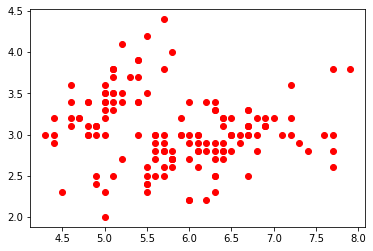

In [13]:
# 데이터의 외형 확인
# plot(x 변수, y 변수, 그래프옵션)
iris2 = iris.toPandas()
plt.plot(iris2['Sepal Length'],iris2['Sepal Width'], 'or')

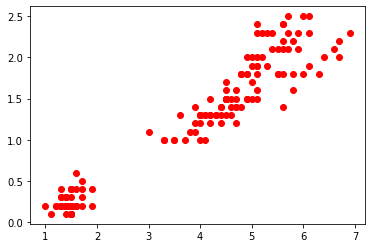

In [14]:
plt.plot(iris2['Petal Length'],iris2['Petal Width'], 'or')

<AxesSubplot:xlabel='Species', ylabel='count'>

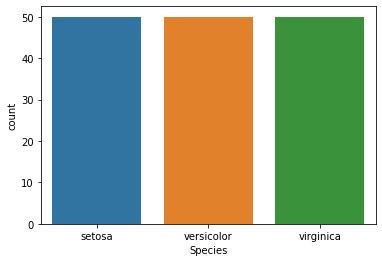

In [15]:
sns.countplot(data=iris2, x='Species')

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

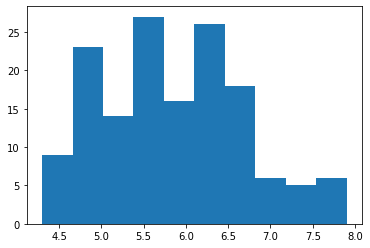

In [16]:
# 연속형 데이터 : 히스토그램
# hist(대상컬럼, 옵션)
plt.hist(iris2['Sepal Length'])

<AxesSubplot:xlabel='Sepal Length', ylabel='Density'>

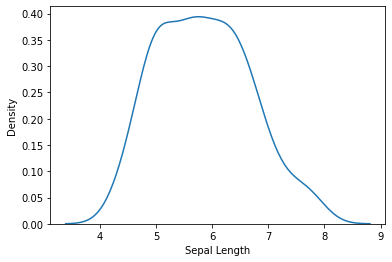

In [17]:
# 확률밀도 그래프 : kde
# kdeplot(변수, 데이터객체)
sns.kdeplot(data=iris2, x='Sepal Length')

In [18]:
# 데이터분석 함수3 : summary, describe
iris.summary().show()
iris.summary(['count','mean','min','max']).show()
iris.select(col('Sepal Length'), col('Sepal Width')).summary(['count','mean','min','max']).show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      Sepal Length|        Sepal Width|      Petal Length|       Petal Width|  Species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    25%|               5.1|                2.8|               1.6|               0.3|     null|
|    50%|               5.8|                3.0|               4.3|               1.3|     null|
|    75%|               6.4|                3.3|               5.1|               1.8|     null|
|    max|               7.9|  

In [19]:
iris.describe().show()
iris.describe(['Sepal Length','Sepal Width']).show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      Sepal Length|        Sepal Width|      Petal Length|       Petal Width|  Species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    max|               7.9|                4.4|               6.9|               2.5|virginica|
+-------+------------------+-------------------+------------------+------------------+---------+

+-------+------------------+-------------------+
|summary|      Sepal Length|        Sepal Width|
+-------+------------------+

### loan 데이터 분석

In [20]:
loans = spark.read.csv('csv/loan.csv', header=True, inferSchema=True)
loans.show(5)
loans2 = loans.toPandas()

+-------+------------+-------------+-----------------------+-----------------------------------------------+-------------+---------------+-----------+-------------+---+----------------+-----+
|loan_id|loan_purpose|is_first_loan|total_credit_card_limit|avg_percentage_credit_card_limit_used_last_year|saving_amount|checking_amount|is_employed|yearly_salary|age|dependent_number|label|
+-------+------------+-------------+-----------------------+-----------------------------------------------+-------------+---------------+-----------+-------------+---+----------------+-----+
|    A_1|    personal|            1|                   7900|                                            0.8|         1103|           6393|          1|        16400| 42|               4|    0|
|    A_2|    personal|            0|                   3300|                                           0.29|         2588|            832|          1|        75500| 56|               1|    0|
|    A_3|    personal|            0|    

+-----+-----+
|label|count|
+-----+-----+
|    1|16201|
|    0|30550|
+-----+-----+



<AxesSubplot:xlabel='label', ylabel='count'>

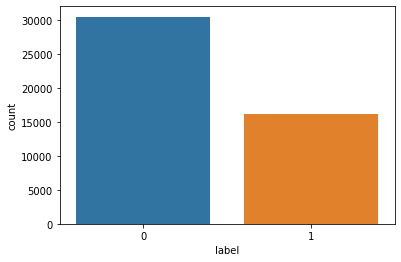

In [21]:
# 대출 여부 건수
loans.groupBy('label').count().show()
sns.countplot(data=loans2, x='label')

+------------+-----+
|loan_purpose|count|
+------------+-----+
|      others| 6763|
|   emergency| 7562|
|    property|11388|
|  operations|10580|
|    personal|10458|
+------------+-----+



<AxesSubplot:xlabel='loan_purpose', ylabel='count'>

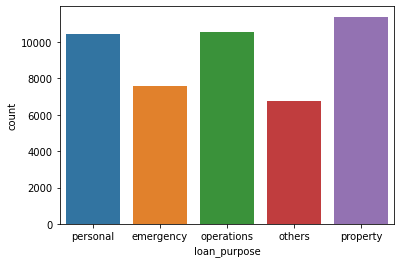

In [22]:
# 대출 목적별 현황
loans.groupBy('loan_purpose').count().show()
sns.countplot(data=loans2, x='loan_purpose')

+-------------+-----+
|is_first_loan|count|
+-------------+-----+
|            1|25313|
|            0|21438|
+-------------+-----+



<AxesSubplot:xlabel='is_first_loan', ylabel='count'>

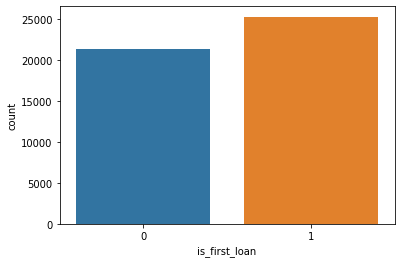

In [23]:
# 처음 대출 여부 현황 
loans.groupBy('is_first_loan').count().show()
sns.countplot(data=loans2, x='is_first_loan')

+-----------+-----+
|is_employed|count|
+-----------+-----+
|          1|42886|
|          0| 3865|
+-----------+-----+



<AxesSubplot:xlabel='is_employed', ylabel='count'>

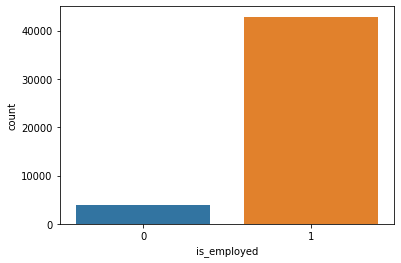

In [24]:
# 대출시 근로자 여부 현황
loans.groupBy('is_employed').count().show()
sns.countplot(data=loans2, x='is_employed')

+----------------+-----+
|dependent_number|count|
+----------------+-----+
|               0| 1738|
|               1| 9894|
|               2| 8552|
|               3| 6047|
|               4| 4467|
|               5| 3256|
|               6| 2373|
|               7| 1842|
|               8| 8582|
+----------------+-----+



<AxesSubplot:xlabel='dependent_number', ylabel='count'>

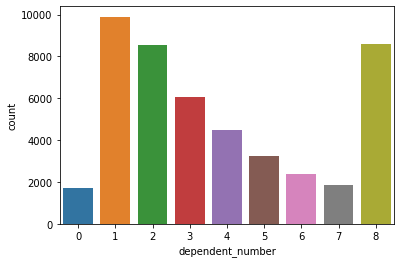

In [25]:
# 부양 가족수 현황 dependent_number
loans.groupBy('dependent_number').count().orderBy('dependent_number').show()
sns.countplot(data=loans2, x='dependent_number')

(array([4452., 5725., 7441., 7923., 7553., 5890., 3880., 2274., 1126.,
         487.]),
 array([18. , 24.1, 30.2, 36.3, 42.4, 48.5, 54.6, 60.7, 66.8, 72.9, 79. ]),
 <BarContainer object of 10 artists>)

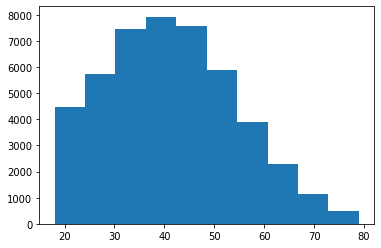

In [26]:
# 대출자 나이 분포 age
plt.hist(loans2['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

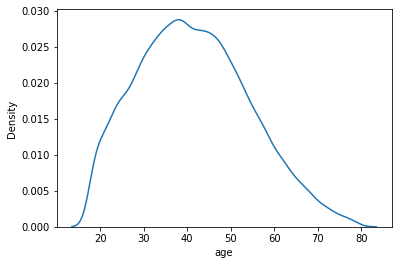

In [27]:
sns.kdeplot(data=loans2, x='age')

+-------------+-----+
|yearly_salary|count|
+-------------+-----+
|            0| 3874|
|          100|    4|
|          200|    8|
|          300|   15|
|          400|    6|
|          500|   14|
|          600|   10|
|          700|   10|
|          800|   10|
|          900|    7|
|         1000|   12|
|         1100|    9|
|         1200|    7|
|         1300|   10|
|         1400|    6|
|         1500|   10|
|         1600|   14|
|         1700|    6|
|         1800|   11|
|         1900|    8|
+-------------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='yearly_salary', ylabel='Density'>

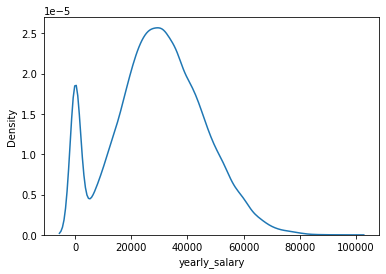

In [28]:
# 대출자 급여 분포 yearly_salary
loans.groupBy('yearly_salary').count().orderBy('yearly_salary').show()
sns.kdeplot(data=loans2, x='yearly_salary')

+-------------+-----+
|saving_amount|count|
+-------------+-----+
|            0|    2|
|            1|    1|
|            2|   10|
|            3|    5|
|            4|    5|
|            5|    5|
|            6|    3|
|            7|    3|
|            8|    5|
|            9|    7|
|           10|    8|
|           11|    8|
|           12|    6|
|           13|    3|
|           14|    5|
|           15|    7|
|           16|    5|
|           17|    6|
|           18|    7|
|           19|    6|
+-------------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='saving_amount', ylabel='Density'>

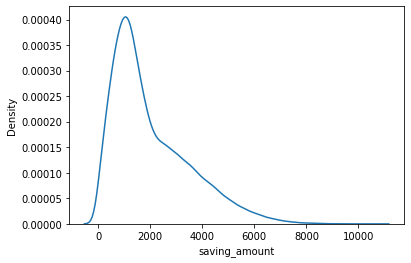

In [29]:
# 대출자 저축금액 분포 saving_amount
loans.groupBy('saving_amount').count().orderBy('saving_amount').show()
sns.kdeplot(data=loans2, x='saving_amount')

### 대출여부 종속변수는 범주형이므로 분석방법은 분류를 이용
-> 로지스틱 회귀, 의사결정나무, 랜덤포레스트, 앙상블

In [30]:
loans.show(5)

+-------+------------+-------------+-----------------------+-----------------------------------------------+-------------+---------------+-----------+-------------+---+----------------+-----+
|loan_id|loan_purpose|is_first_loan|total_credit_card_limit|avg_percentage_credit_card_limit_used_last_year|saving_amount|checking_amount|is_employed|yearly_salary|age|dependent_number|label|
+-------+------------+-------------+-----------------------+-----------------------------------------------+-------------+---------------+-----------+-------------+---+----------------+-----+
|    A_1|    personal|            1|                   7900|                                            0.8|         1103|           6393|          1|        16400| 42|               4|    0|
|    A_2|    personal|            0|                   3300|                                           0.29|         2588|            832|          1|        75500| 56|               1|    0|
|    A_3|    personal|            0|    

In [31]:
# 결측치 여부 확인
loans2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46751 entries, 0 to 46750
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   loan_id                                          46751 non-null  object 
 1   loan_purpose                                     46751 non-null  object 
 2   is_first_loan                                    46751 non-null  int32  
 3   total_credit_card_limit                          46751 non-null  int32  
 4   avg_percentage_credit_card_limit_used_last_year  46751 non-null  float64
 5   saving_amount                                    46751 non-null  int32  
 6   checking_amount                                  46751 non-null  int32  
 7   is_employed                                      46751 non-null  int32  
 8   yearly_salary                                    46751 non-null  int32  
 9   age                         

<AxesSubplot:>

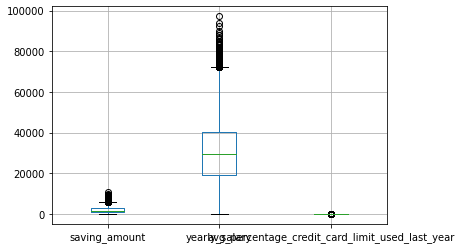

In [32]:
# 이상치 여부 확인
loans2.boxplot(column=['saving_amount','yearly_salary','avg_percentage_credit_card_limit_used_last_year'])

### 레이블 인코딩
- one, two, three 등의 데이터를 레이블 인코딩 하면?
    - 0 : one, 1 : three, 2 : two

### 원핫인코딩 : 레이블인코딩의 단점 보완
+ one, two, three 등의 데이터를 레이블 인코딩 하면?
    + one   two   three </br>
      1     0      0    : one </br>
      0     1      0    : two </br>
      0     0      1    : three </br>
      최종적으로 만들어진 코드 : 100, 010, 001

In [33]:
# 범주형 변수를 수치형으로 변경
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# 문자형 변수의 값을 숫자형으로 변환하기 위해 레이블 인코딩 수행
# StringIndexer(입력컬럼, 대상컬럼).fit(데이터프레임)
lp_idx = StringIndexer(inputCol='loan_purpose', outputCol='lp_idx').fit(loans)

# 레이블 인코딩 결과를 이용해서 대출목적 컬럼의 값을 숫자형으로 변경
loan_idx = lp_idx.transform(loans)
loan_idx.select('loan_purpose','lp_idx').show(5)

+------------+------+
|loan_purpose|lp_idx|
+------------+------+
|    personal|   2.0|
|    personal|   2.0|
|    personal|   2.0|
|    personal|   2.0|
|   emergency|   3.0|
+------------+------+
only showing top 5 rows



In [34]:
# 분류 분석을 위해 원핫인코딩으로 변환
lp_ohe = OneHotEncoder(inputCol='lp_idx', outputCol='lp_ohe')
loan_ohe = lp_ohe.transform(loan_idx)
loan_ohe.select('loan_purpose','lp_idx','lp_ohe').show(5)

+------------+------+-------------+
|loan_purpose|lp_idx|       lp_ohe|
+------------+------+-------------+
|    personal|   2.0|(4,[2],[1.0])|
|    personal|   2.0|(4,[2],[1.0])|
|    personal|   2.0|(4,[2],[1.0])|
|    personal|   2.0|(4,[2],[1.0])|
|   emergency|   3.0|(4,[3],[1.0])|
+------------+------+-------------+
only showing top 5 rows



In [35]:
# 독립변수와 종속변수를 하나로 묶음
from pyspark.ml.feature import VectorAssembler

vdf = VectorAssembler(inputCols=['lp_ohe', 'is_first_loan', 'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'saving_amount', 'checking_amount', 
                                 'is_employed', 'yearly_salary', 'age', 'dependent_number'], outputCol='features')
loans = vdf.transform(loan_ohe)
loans.select('features', 'label').show(5, False)

+--------------------------------------------------------------------+-----+
|features                                                            |label|
+--------------------------------------------------------------------+-----+
|[0.0,0.0,1.0,0.0,1.0,7900.0,0.8,1103.0,6393.0,1.0,16400.0,42.0,4.0] |0    |
|[0.0,0.0,1.0,0.0,0.0,3300.0,0.29,2588.0,832.0,1.0,75500.0,56.0,1.0] |0    |
|[0.0,0.0,1.0,0.0,0.0,7600.0,0.9,1651.0,8868.0,1.0,59000.0,46.0,1.0] |0    |
|[0.0,0.0,1.0,0.0,1.0,3400.0,0.38,1269.0,6863.0,1.0,26000.0,55.0,8.0]|0    |
|[0.0,0.0,0.0,1.0,0.0,2600.0,0.89,1310.0,3423.0,1.0,9700.0,41.0,4.0] |1    |
+--------------------------------------------------------------------+-----+
only showing top 5 rows



In [36]:
# 분석을 위해 독립변수와 종속변수를 추출해서 새로운 변수 생성
model_df = loans.select('features', 'label')
model_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,1.0,0.0,...|    0|
|[0.0,0.0,1.0,0.0,...|    0|
|[0.0,0.0,1.0,0.0,...|    0|
|[0.0,0.0,1.0,0.0,...|    0|
|[0.0,0.0,0.0,1.0,...|    1|
+--------------------+-----+
only showing top 5 rows



In [37]:
# train, test로 분리
train, test = model_df.randomSplit([0.75, 0.25])

In [38]:
# 모델 훈련
from pyspark.ml.classification import LogisticRegression

In [39]:
lg = LogisticRegression().fit(train)
trainmodel = lg.summary

trainmodel.accuracy             # 정확도
trainmodel.precisionByLabel     # 정밀도
trainmodel.recallByLabel        # 재현율
trainmodel.areaUnderROC         # AUC값

21/11/06 09:43:06 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/11/06 09:43:06 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


0.9586663539986789

In [40]:
# 모델 예측 
pred = lg.transform(test)
pred.show(10, False)	#예측결과 확인

pred = lg.evaluate(test)

pred.accuracy
pred.precisionByLabel
pred.recallByLabel
pred.areaUnderROC

+---------------------------------------------------------------+-----+------------------------------------------+-----------------------------------------+----------+
|features                                                       |label|rawPrediction                             |probability                              |prediction|
+---------------------------------------------------------------+-----+------------------------------------------+-----------------------------------------+----------+
|(13,[0,4,5,6,7,8,11],[1.0,1.0,2500.0,0.82,965.0,1463.0,45.0])  |1    |[-4.203233119856469,4.203233119856469]    |[0.014727044931089815,0.9852729550689101]|1.0       |
|(13,[0,4,5,6,7,8,11],[1.0,1.0,2700.0,0.49,1802.0,526.0,66.0])  |1    |[-2.7849842612470783,2.7849842612470783]  |[0.05814101236232216,0.9418589876376778] |1.0       |
|(13,[0,4,5,6,7,8,11],[1.0,1.0,5400.0,0.89,1524.0,3482.0,45.0]) |0    |[-0.24972682138362945,0.24972682138362945]|[0.43789073882403357,0.5621092611759664] |1.0 

0.9596654173689515

In [41]:
# 오차 행렬 confusion matrix
pred = lg.transform(test)
y_true = pred.select(['label']).collect()
y_pred = pred.select(['prediction']).collect()

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[6991,  651],
       [ 554, 3562]])